# Big Mart Sales Prediction

## Question 1: Load
18 attributes of customers' credit card usage was pulled to determine clusters in the customers based on their spending behaviours.
Programmatically download and load into your favorite analytical tool the transactions data. 
Please describe the structure of the data. Number of records and fields in each record?
Please provide some additional basic summary statistics for each field. Be sure to include a count of null, minimum, maximum, and unique values where appropriate.

## Question 2: Plot
Plot a histogram of each processed account.
Report any structure you find and any hypotheses you have about that structure.

## Question 3: Data Wrangling
Deep dive into the data.
Report anything you found. 

## Question 4: Model
We are going to use classification method to classify two multiple-feature groups. What if the number of features increase? How can we use the method we learned from the class to solve more complicated problems. Following you will need to solve a Credit Card Default Detection Case where you will classify two multiple-feature groups.

## answer for Q1

## answer for Q2

## answer for Q3

## answer for Q4

**Metadata:** <br>
**Item_Identifier**: It is a unique product ID assigned to every distinct item. It consists of an alphanumeric string of length 5 <br>
**Item_Weight**: This field includes the wieght of the product <br>
**Item_Fat_Content**: This attribute is categorical and describes whether the product is low fat or not. There are 2 categories of this attribute: ['Low Fat', 'Regular']. However, it is important to note that 'Low Fat' has also been written as 'low fat' and 'LF' in dataset, whereas, 'Regular' has been referred as 'reg' as well <br>
**Item_Visibility**: This field mentions the percentage of total display area of all products in a store allocated to the particular product <br>
**Item_Type**: This is a categorical attribute and describes the food category to which the item belongs. There are 16 different categories listed as follows: ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood'] <br>
**Item_MRP**: This is the Maximum Retail Price (list price) of the product <br>
**Outlet_Identifier**: It is a unique store ID assigned. It consists of an alphanumeric string of length 6 <br>
**Outlet_Establishment_Year**: This attribute mentions the year in which store was established <br>
**Outlet_Size**: The attribute tells the size of the store in terms of ground area covered. It is a categorical value and described in 3 categories: ['High', 'Medium', 'Small'] <br>
**Outlet_Location_Type**: This field has categorical data and tells about the size of the city in which the store is located through 3 categories: ['Tier 1', 'Tier 2', 'Tier 3'] <br>
**Outlet_Type**: This field contains categorical value and tells whether the outlet is just a grocery store or some sort of supermarket. Following are the 4 categories in which the data is divided: ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3'] <br>
**Item_Outlet_Sales**: This is the outcome variable to be predicted. It contains the sales of the product in the particulat store <br>

## 1. Load

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing Dataset:
raw=pd.read_csv(r"data\raw\Train.csv")
df_shop=raw

In [3]:
df_shop.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
df_shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_shop.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
for col in df_shop.columns:
    print(df_shop[col].value_counts())

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: Item_Visibility, Length: 7880, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat             

In [7]:
#Handling the uppercase and lowercase
df_shop.loc[df_shop['Item_Fat_Content']=='LF','Item_Fat_Content']='Low Fat'
df_shop.loc[df_shop['Item_Fat_Content']=='low fat','Item_Fat_Content']='Low Fat'
df_shop.loc[df_shop['Item_Fat_Content']=='reg','Item_Fat_Content']='Regular'

In [8]:
df_shop["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [9]:
#Calculating Missing Values
df_shop.isnull().sum().sort_values(ascending=False)

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
#Imputation Of Missing Values in the item_weight
group_mean_weight = df_shop.pivot_table(index = "Item_Type", values = "Item_Weight", aggfunc = np.mean)

In [11]:
group_mean_weight

,Item_Weight
Item_Type,
Baking Goods,12.277108
Breads,11.346936
Breakfast,12.768202
Canned,12.305705
Dairy,13.426069
Frozen Foods,12.867061
Fruits and Vegetables,13.224769
Hard Drinks,11.400328
Health and Hygiene,13.142314


In [12]:
# Function to impute Missing Value in item_weight column
def missing_value_item_weight(cols):
    item_type = cols[0]
    item_weight =cols[1]
    if pd.isnull(item_weight):
        if item_type == "Baking Goods":
            return 12.277
        elif item_type == "Breads":
            return 11.347
        elif item_type == "Breakfast":
            return 12.768
        elif item_type == "Canned":
            return 12.306
        elif item_type == "Dairy":
            return 13.426
        elif item_type == "Frozen Foods":
            return  12.867
        elif item_type == "Fruits and Vegetables":
            return 13.225
        elif item_type == "Hard Drinks":
            return 11.400
        elif item_type == "Health and Hygiene":
            return 13.142
        elif item_type == "Household":
            return 13.384
        elif item_type == "Meat":
            return 12.817
        elif item_type == "Others":
            return 13.853
        elif item_type == "Seafood":
            return 12.552
        elif item_type == "Snack Foods":
            return 12.987
        elif item_type == "Soft Drinks":
            return 11.847
        elif item_type == "Starchy Foods":
            return 13.690
    return item_weight             

In [13]:
#Imputing the missing value by using defined function
df_shop["Item_Weight"] = df_shop[["Item_Type","Item_Weight"]].apply(missing_value_item_weight, axis = 1)

In [14]:
df_shop.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Supermarket Type1'),
  Text(1, 0, 'Supermarket Type2'),
  Text(2, 0, 'Grocery Store'),
  Text(3, 0, 'Supermarket Type3')])

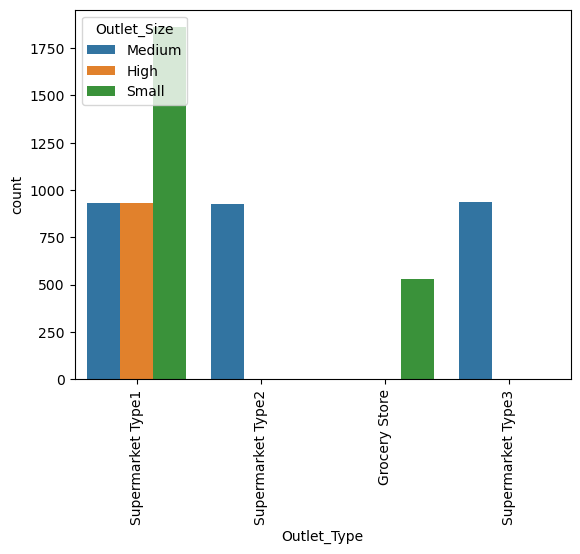

In [15]:
#Imputation Of Missing Values in the outlet size
sns.countplot(data = df_shop, x = "Outlet_Type", hue = "Outlet_Size")
plt.xticks(rotation = 90)

In [16]:
# Function for Imputing Missing value in Outlet_Size column
def missing_value_outlet_size(cols):
    size = cols[0]
    ot_type = cols[1]
    if pd.isnull(size):
        if ot_type == "Supermarket Type1":
            return "Small"
        elif ot_type == "Supermarket Type2":
            return "Medium"
        elif ot_type == "Grocery Store":
            return "Small"
        elif ot_type == "Supermarket Type3":
            return "Medium"
    return size    

In [17]:
#Imputing the missing value by using defined function
df_shop["Outlet_Size"] = df_shop[["Outlet_Size","Outlet_Type"]].apply(missing_value_outlet_size, axis = 1)

In [18]:
df_shop.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [19]:
#While exploring the item_visibility, We Found many items visibility as 0.0 which is impossible. 
#Hence, imputing these 0.0 values with knn for item of visibility.
for i in range(2,len(df_shop)-1):
    if df_shop.Item_Visibility.iloc[i]==0:
        df_shop.Item_Visibility.iloc[i]=np.mean(df_shop.Item_Visibility.iloc[i-1]+
                                                df_shop.Item_Visibility.iloc[i-2]+
                                                df_shop.Item_Visibility.iloc[i+1]+
                                                df_shop.Item_Visibility.iloc[i+2])

C:\Users\zhang\AppData\Local\Temp\ipykernel_19752\933297346.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_shop.Item_Visibility.iloc[i]=np.mean(df_shop.Item_Visibility.iloc[i-1]+


In [20]:
df_shop.Item_Visibility.value_counts()

0.076975    3
0.044024    2
0.040912    2
0.076856    2
0.078759    2
           ..
0.021011    1
0.099189    1
0.076866    1
0.014116    1
0.044878    1
Name: Item_Visibility, Length: 8405, dtype: int64

## 2. Plot

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'OUT049'),
  Text(1, 0, 'OUT018'),
  Text(2, 0, 'OUT010'),
  Text(3, 0, 'OUT013'),
  Text(4, 0, 'OUT027'),
  Text(5, 0, 'OUT045'),
  Text(6, 0, 'OUT017'),
  Text(7, 0, 'OUT046'),
  Text(8, 0, 'OUT035'),
  Text(9, 0, 'OUT019')])

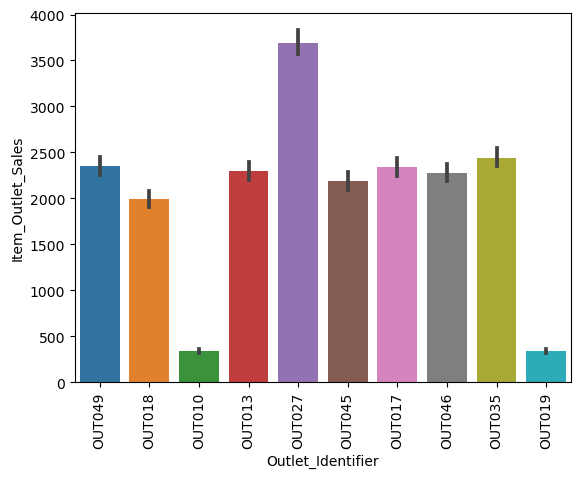

In [21]:
#understanding outlet_identifier depending on item_outlet_sales
sns.barplot(data = df_shop, x = "Outlet_Identifier", y= "Item_Outlet_Sales")
plt.xticks(rotation=90)

Text(0, 0.5, 'Mean of Item outlet sales')

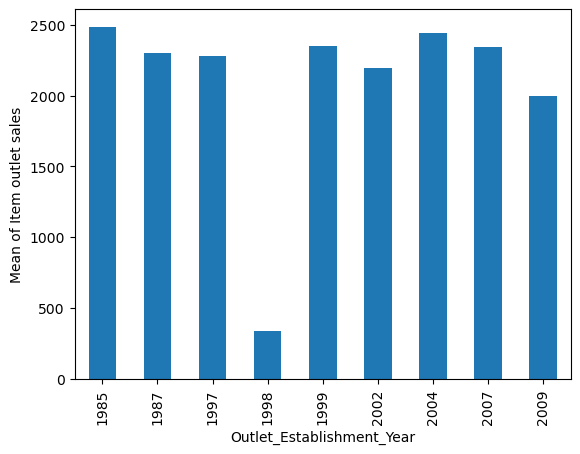

In [22]:
#Understanding to oultet_establishment per year with respective to mean of each respective year item outlet sales
mean_outlet_year=df_shop.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].mean()
mean_outlet_year.plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

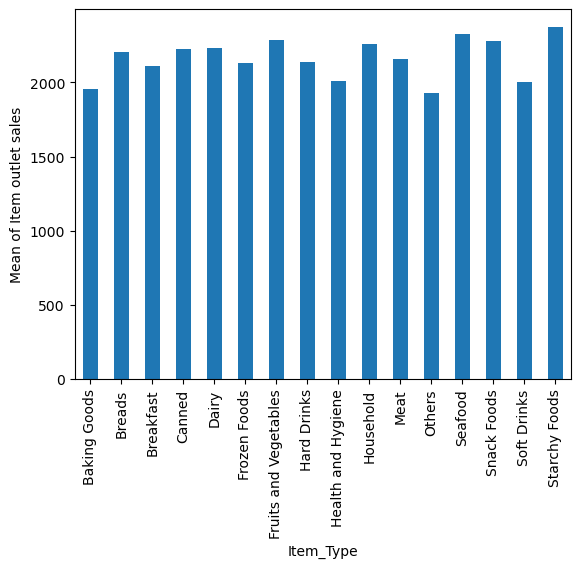

In [23]:
#Understanding to item_type per year with respective to mean of each respective year item outlet sales
mean_type=df_shop.groupby("Item_Type")["Item_Outlet_Sales"].mean()
mean_type.plot.bar()
plt.ylabel("Mean of Item outlet sales")

Text(0, 0.5, 'Mean of Item outlet sales')

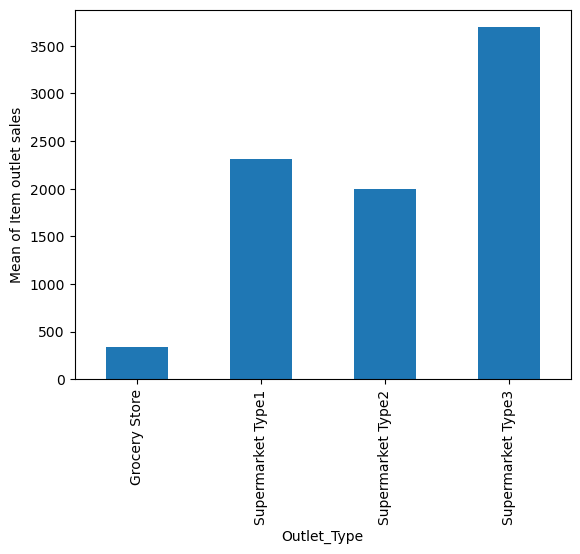

In [24]:
#Understanding to outlet_type per year with respective to mean of each respective year item outlet sales
mean_outlet=df_shop.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()
mean_outlet.plot.bar()
plt.ylabel("Mean of Item outlet sales")

In [25]:
# Replacing The Categorical Values Containing Columns With Their Respective Frequency or Count
cols = ['Item_Identifier', 'Item_Fat_Content',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

In [26]:
#MAPPING EACH CATEGORICAL COLUMN WITH RESPECTIVE FREQUENCY OF THE VALUES IN THE COLUMNS
for i in cols:
    x  = df_shop[i].value_counts().to_dict()
    df_shop[i] = df_shop[i].map(x)

In [27]:
#RESULTING DATASET AFTER CATEGORICAL VALUES CONVERTED TO NUMERICAL COLUMN
df_shop.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,8,9.30,5517,0.016047,682,249.8092,930,930,2793,2388,5577,3735.1380
1,6,5.92,3006,0.019278,445,48.2692,928,928,2793,3350,928,443.4228
2,7,17.50,5517,0.016760,425,141.6180,930,930,2793,2388,5577,2097.2700
3,6,19.20,3006,0.036038,1232,182.0950,555,555,4798,3350,1083,732.3800
4,6,8.93,5517,0.065539,910,53.8614,932,932,932,3350,5577,994.7052


In [28]:
#COPYING DATA 
new_data= df_shop.copy()

<AxesSubplot:>

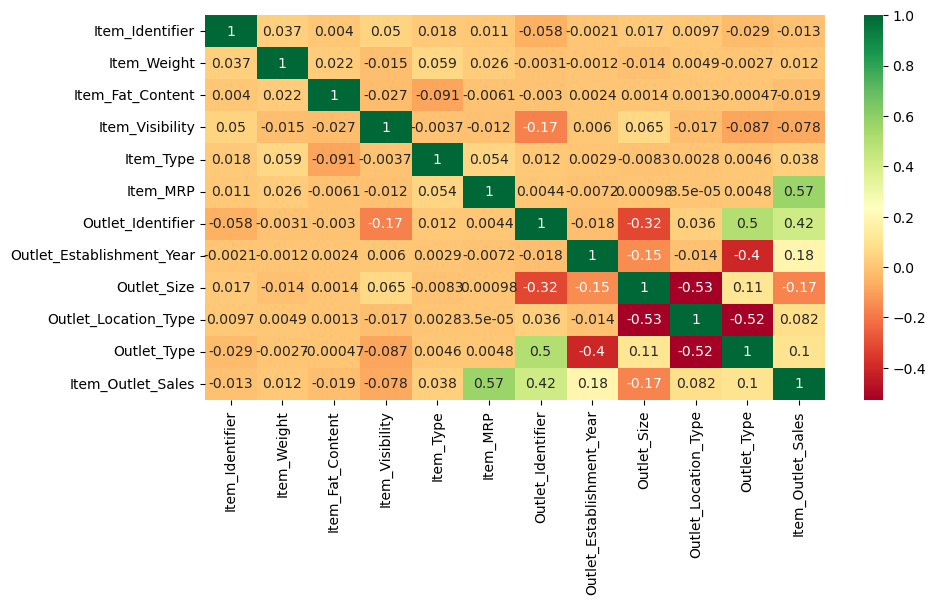

In [29]:
#FINDING CORRELATION BETWEEN EACH COLUMNS BY USING HEATMAP
plt.figure(figsize = (10,5))
sns.heatmap(new_data.corr(), cmap = "RdYlGn", annot = True)

In [30]:
#REMOVING LESS CORRELATED COLUMNS 
new_data.drop(['Item_Identifier'], axis=1, inplace=True)
new_data.drop(["Outlet_Location_Type"], axis = 1, inplace=True)

In [31]:
new_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.30,5517,0.016047,682,249.8092,930,930,2793,5577,3735.1380
1,5.92,3006,0.019278,445,48.2692,928,928,2793,928,443.4228
2,17.50,5517,0.016760,425,141.6180,930,930,2793,5577,2097.2700
3,19.20,3006,0.036038,1232,182.0950,555,555,4798,1083,732.3800
4,8.93,5517,0.065539,910,53.8614,932,932,932,5577,994.7052


In [32]:
#CALCULATING THE SKEWNESS OF THE DATA
new_data.skew()

Item_Weight                  0.089568
Item_Fat_Content            -0.616705
Item_Visibility              2.880978
Item_Type                   -0.154209
Item_MRP                     0.127202
Outlet_Identifier           -2.244651
Outlet_Establishment_Year    0.936439
Outlet_Size                 -0.803018
Outlet_Type                 -0.650418
Item_Outlet_Sales            1.177531
dtype: float64

In [33]:
new_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,9.30,5517,0.016047,682,249.8092,930,930,2793,5577,3735.1380
1,5.92,3006,0.019278,445,48.2692,928,928,2793,928,443.4228
2,17.50,5517,0.016760,425,141.6180,930,930,2793,5577,2097.2700
3,19.20,3006,0.036038,1232,182.0950,555,555,4798,1083,732.3800
4,8.93,5517,0.065539,910,53.8614,932,932,932,5577,994.7052


C:\Users\zhang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

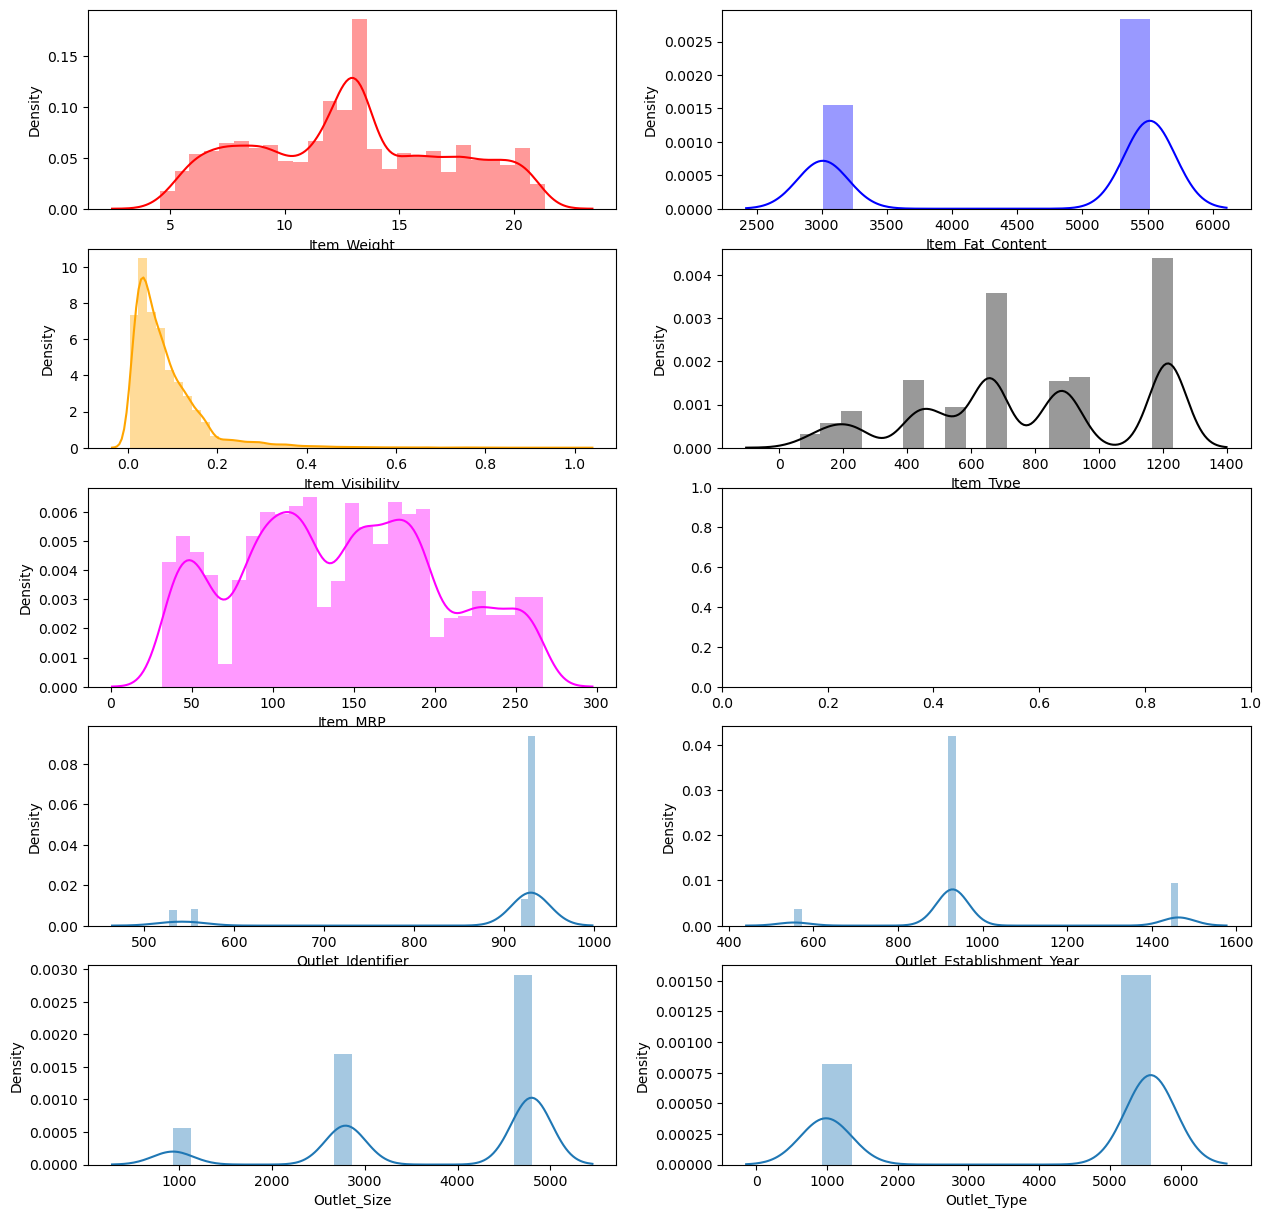

In [34]:
# Before Transformation
fig, ax = plt.subplots(5,2,figsize = (15,15))
sns.distplot(new_data["Item_Weight"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["Item_Fat_Content"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["Item_Visibility"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["Item_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["Item_MRP"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["Outlet_Identifier"], kde =True, ax=ax[3,0])
sns.distplot(new_data["Outlet_Establishment_Year"], kde =True, ax=ax[3,1])
sns.distplot(new_data["Outlet_Size"], kde =True, ax=ax[4,0])
sns.distplot(new_data["Outlet_Type"], kde =True, ax=ax[4,1])

### From the above plot it is clear that many columns are not following the normal distribution and not properly scaled. Therefore, we will apply "Logarithmic" Transformation on above dataset to make it scale and reduce the skewness.

In [35]:
for i in new_data.columns:
    new_data[i] =np.log(new_data[i])

In [36]:
new_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,2.230014,8.615590,-4.132215,6.525030,5.520697,6.835185,6.835185,7.934872,8.626406,8.225540
1,1.778336,8.008366,-3.948780,6.098074,3.876794,6.833032,6.833032,7.934872,6.833032,6.094524
2,2.862201,8.615590,-4.088756,6.052089,4.953133,6.835185,6.835185,7.934872,8.626406,7.648392
3,2.954910,8.008366,-3.323173,7.116394,5.204529,6.318968,6.318968,8.475954,6.987490,6.596300
4,2.189416,8.615590,-2.725103,6.813445,3.986414,6.837333,6.837333,6.837333,8.626406,6.902446


C:\Users\zhang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\zhang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

<AxesSubplot:xlabel='Outlet_Type', ylabel='Density'>

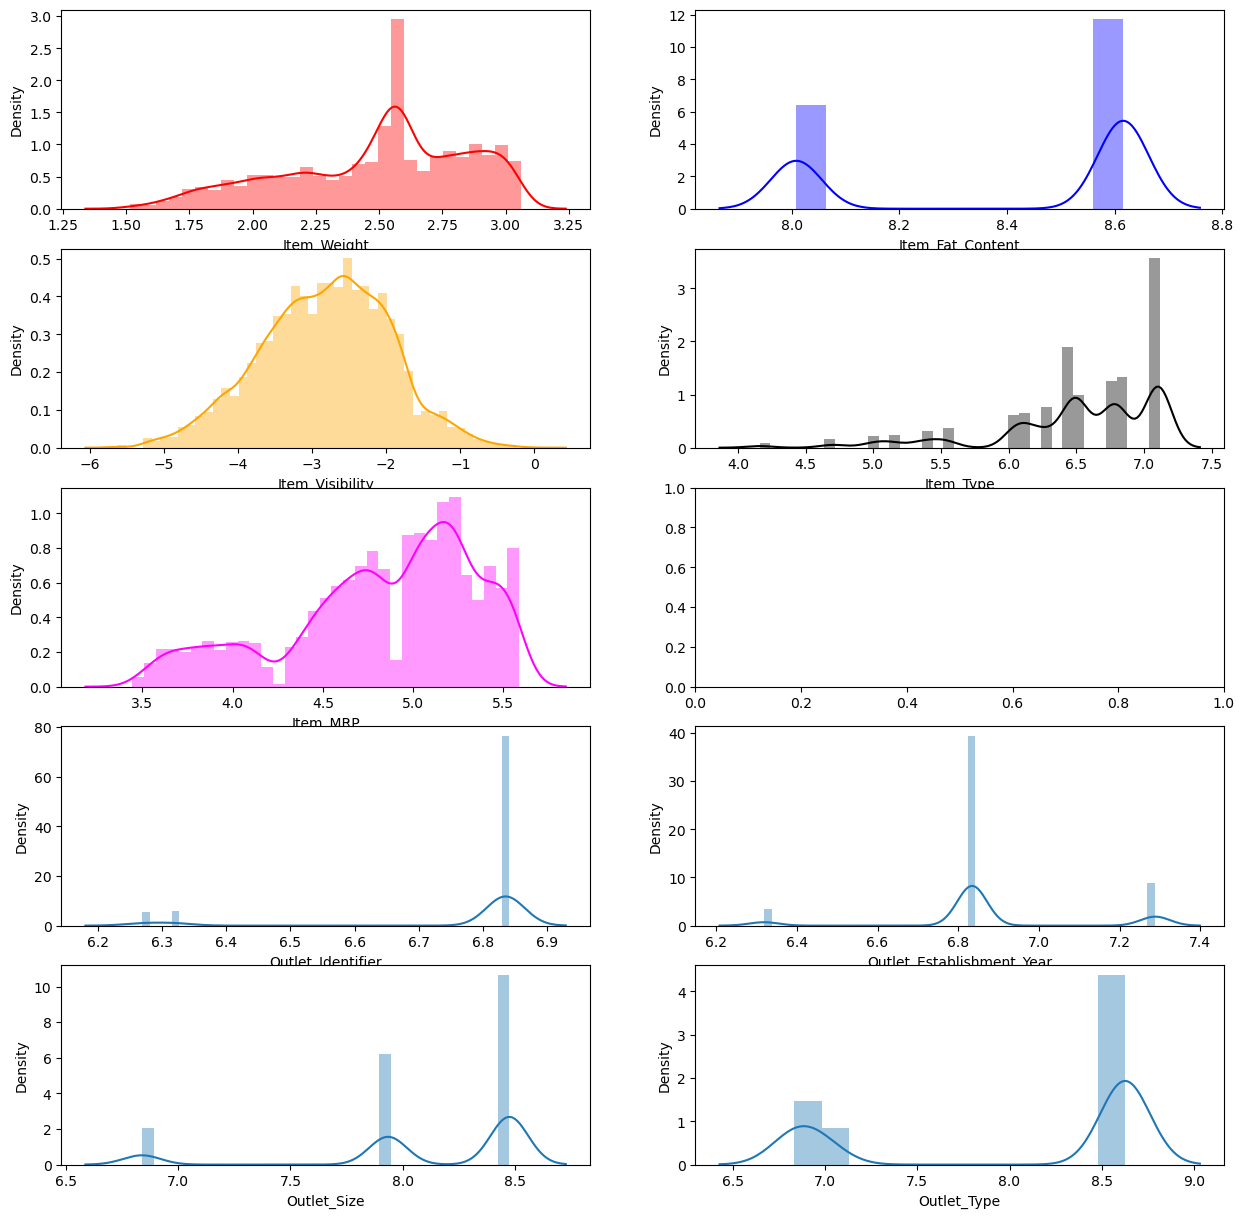

In [37]:
# After Transformation
fig, ax = plt.subplots(5,2,figsize = (15,15))
sns.distplot(new_data["Item_Weight"], kde =True, ax=ax[0,0], color = "red")
sns.distplot(new_data["Item_Fat_Content"], kde =True, ax=ax[0,1], color = "blue")
sns.distplot(new_data["Item_Visibility"], kde =True, ax=ax[1,0], color = "orange")
sns.distplot(new_data["Item_Type"], kde =True, ax=ax[1,1], color = "black")
sns.distplot(new_data["Item_MRP"], kde =True, ax=ax[2,0], color = "magenta")
sns.distplot(new_data["Outlet_Identifier"], kde =True, ax=ax[3,0])
sns.distplot(new_data["Outlet_Establishment_Year"], kde =True, ax=ax[3,1])
sns.distplot(new_data["Outlet_Size"], kde =True, ax=ax[4,0])
sns.distplot(new_data["Outlet_Type"], kde =True, ax=ax[4,1])

In [38]:
new_data.skew()

Item_Weight                 -0.527129
Item_Fat_Content            -0.616705
Item_Visibility             -0.160107
Item_Type                   -1.410931
Item_MRP                    -0.735795
Outlet_Identifier           -2.249965
Outlet_Establishment_Year    0.026025
Outlet_Size                 -1.539875
Outlet_Type                 -0.657515
Item_Outlet_Sales           -0.887753
dtype: float64

## 3. Baseline model

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso, Ridge

In [41]:
#Independent Variables
x = new_data.drop("Item_Outlet_Sales", axis = 1) 
#Depenedent Variables 
y = new_data["Item_Outlet_Sales"]

In [42]:
#Splitting The data  into Train and Test Dataset:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size =0.20, random_state = 3)

In [43]:
#Applying Linear Regression Model
regressor =LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [44]:
#Prediction
y_pred = regressor.predict(x_test)

In [45]:
#Accuracy of Model (Apply R2_score)
r2_score(y_test, y_pred)

0.7564711296566946

In [46]:
#Checking Root Mean Square error
rmse = sqrt(mean_squared_error(y_test,  y_pred))
rmse

0.5203742036342112

In [47]:
#Residue of the Linear Regression Model 
residue_lr = y_test -y_pred

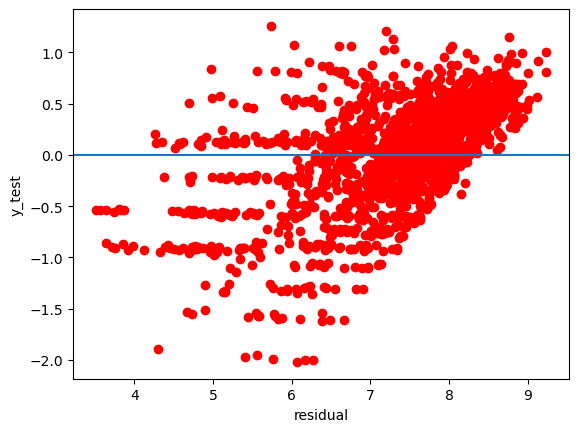

In [48]:
#Plotting Residual Plot
plt.scatter(y_test,residue_lr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [49]:
#Apply Lasso Regularization Technique
ls = Lasso(alpha = 0.009)
ls.fit(x_train, y_train)

Lasso(alpha=0.009)

In [58]:
#prediction by LASSO model
ls_pred = ls.predict(x_test)

In [51]:
#Accuracy After Lasso(by R2_score)
r2_score(y_test,ls_pred)

0.7468491295609132

In [52]:
#Root Mean Square Error
rmse_lasso = sqrt(mean_squared_error(y_test, ls_pred))
rmse_lasso

0.5305547959178087

In [53]:
#Getting Lasso Coefficent
lasso_coeff = pd.Series(ls.coef_, index =x.columns) 

<AxesSubplot:>

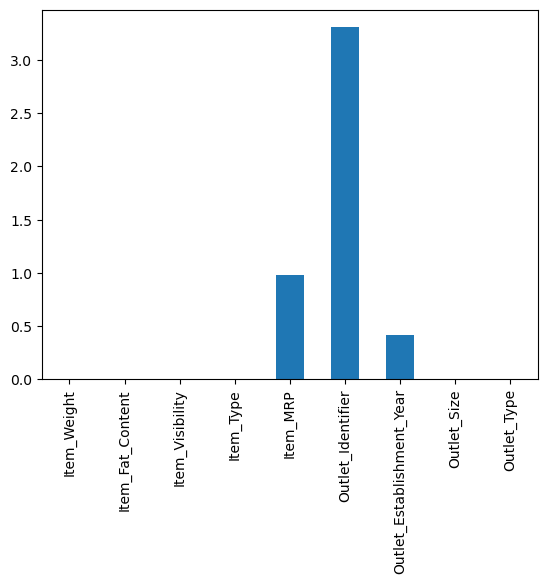

In [54]:
#Visualization of Coefficent after LASSO 
lasso_coeff.plot(kind = "bar")

In [59]:
#RESIDUE VALUE AFTER LASSO REGRESSION
residue = y_test - ls_pred

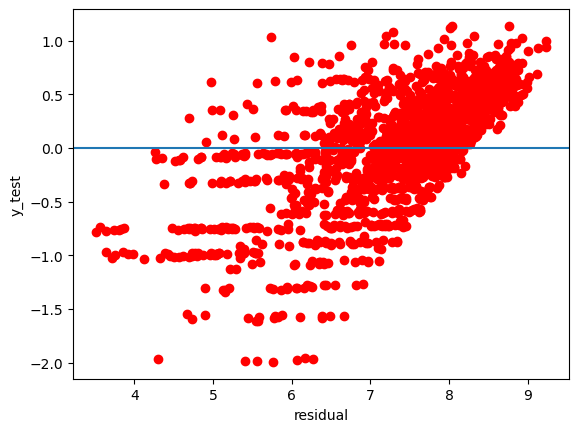

In [61]:
plt.scatter(y_test,residue, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

In [62]:
#Ridge Regression
rr = Ridge(alpha = 0.009)
rr.fit(x_train, y_train)

Ridge(alpha=0.009)

In [63]:
#Prediction AFTER Ridge regression
rr_pred = rr.predict(x_test)

In [64]:
#Accuracy score check
r2_score(y_test, y_pred)

0.7564711296566946

In [65]:
#RMSE
rmse_ridge = sqrt(mean_squared_error(y_test, rr_pred))
rmse_ridge

0.5203766578836324

In [66]:
#residue after ridge
residue_rr = y_test-rr_pred

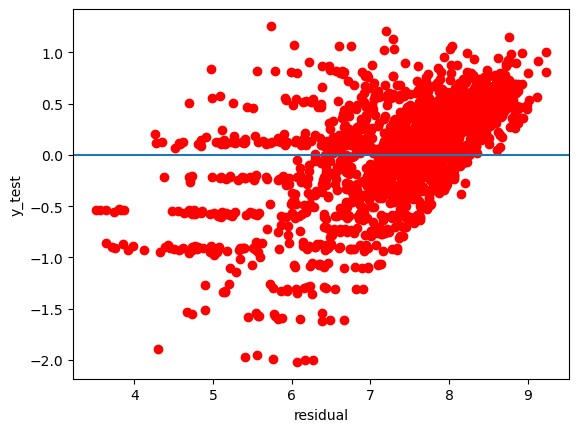

In [67]:
#plotting of residual graph after RIDGE REGRESSION
plt.scatter(y_test,residue_rr, c = "red")
plt.xlabel("residual")
plt.ylabel("y_test")
plt.axhline(y = 0)

1.From above three different model after applying LASSO AND RIDGE Regression,  we can accept the model which is giving the better "**RMSE SCORE**" and higher accuracy (R2_SCORE). <br>
2. Lasso Regression is showing the low accuracy in terms of Linear regression. <br>
3. Ridge Regression is showing the similar accuracy in terms of Linear Regression. <br>
HENCE, ACCEPTING THE LINEAR REGRESSION MODEL TO PREDICT THE TEST DATA ITEM OUTLET SALE.